In [2]:
import pandas as pd

In [3]:
df = pd.read_excel('Testing.xlsx')

In [17]:
#df

In [5]:
# Drop NaN values in Dataframe
df = df.dropna()
# Show Dataframe
df

,Mode,Message
0,Angry,Tu to chup kr ja desh
1,Angry,Bush kr de bush
2,Normal,Ya puchna ya tha k Shair kisi b traha ka send ...
3,Happy,Han g phir to any dain gy per ap k any k bgair...
4,Normal,Everyone please bs kro yr
...,...,...
525,Normal,cr ko add kro bas
526,Normal,Mujhy interest ni wrna m ye khel leni thi
528,Fear,Mauf kar dein
533,Angry,Ankhon ka msla ho to m maan b lon


In [ ]:
#df = df.sample(frac = 1)
#df

In [ ]:
# Get the unique values of 'Mode' column
df.Mode.unique()

In [ ]:
# Change Column value --> from 'fear' to 'Fear' :)
df["Mode"].replace({"Angry ": "Angry", "fear": "Fear"}, inplace=True)

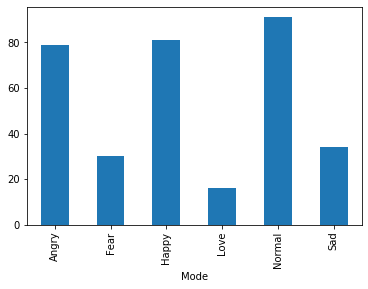

In [16]:
import matplotlib.pyplot as plt

# a simple line plot
#df.plot(kind='bar',x='Mode',y='Message')
df.groupby('Mode')['Message'].nunique().plot(kind='bar')
plt.show()

In [18]:
df['Mode'].value_counts()

Normal    91
Happy     81
Angry     79
Sad       34
Fear      30
Love      16
Name: Mode, dtype: int64